In [1]:
# setup notebook
# notebook formatting
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# enable split cells in notebook
# if not installed:  pip install jupyter_contrib_nbextensions; then repeat this cmd
!jupyter nbextension enable splitcell/splitcell  

# fix RISE scollbar missing
# if RISE scroll not working fix path to match your jupyter nbconfig, uncomment below and run
# from traitlets.config.manager import BaseJSONConfigManager
# path = "~\user\.jupyter\nbconfig"
# cm = BaseJSONConfigManager(config_dir=path)

# cm.update("livereveal", {
#              "scroll": True,
# });

# imports
import os
import random

# math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# visualization - imports and setting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

Enabling notebook extension splitcell/splitcell...
      - Validating: ok


# Effective Visualizations
<table>
    <th style="float:center; width:100%"></th>
  <tr>
      <td><img src="./images/minard.napoleon_russia_1812.png" width=500 alt="Approximation of Napoleon Russian Campaign" title="European context of Napoleon Russian Campaign" style="float:center; width:100%"/></td>
  </tr>
</table>


### About Me...
* Chris Brousseau
* @surfaceowl
* chris@surfaceowl.com


### What I do...
* Founder: Surface Owl
* Data Scientist
* Python Development
* PyBay Diversity & Inclusion Chair
* Recovering Consultant


# Agenda

1- Understand why effective visualizations are important

2- Learn how to choose the right visual approach

3- Learn about the python visualization universe

4- Foundation - matplotlib

5- Future - bokeh


In [2]:
%%html
<style>
style="vertical-align: text-top";
table {float:left}
</style>

# 1- Understand why effective visualizations are important


# Why Visualizations?<br>
- communicate information + story to <b> accomplish a goal</b>
- goal can be:
   - create understanding
   - convice someone to take action

- Graphics provide super efficient compression of data

- [what makes a good visualization?  source: information is beautiful](https://informationisbeautiful.net/visualizations/what-makes-a-good-data-visualization/)

- People have powerful ability of visual perception - let's help them use it



# Why visualization is important:  *Create Understanding*<br>
# Charles Minard's Map of the March to Moscow

<img src="./images/minard.napoleon_russia_1812.png" alt="Charles Joseph Minards map of Napoleon Russian Campaign" title="The Best Statistical Graph ever drawn - Charles Joseph Minards map of Napoleon Russian Campaign" />

# Why is visualization important?  *Convince people to Take Action*<br>


<table> <tr> <th style="width:50%"></th> <th></th> </tr> 
    <tr> 
        <td><a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><img src="./images/challenger.photo.1110px-Challenger_explosion.jpg" alt="Space Shuttle Challenger Disaster - 28 Jan 1986" title="Space Shuttle Challenger Disaster" /></a></td>
        <td style="vertical-align:top; text-align:left; font-size: 120%"> <strong>
            <b>Challenger Disaster</b><br><br>
            - All seven crew members died<br><br> 
            - five NASA astronauts, one payload specialist, and a civilian school teacher<br><br>
            - caused by the failure of O-ring seals in right solid rocket booster<br><br>
            - NASA managers disregarded NO-LAUNCH warnings from engineers<br><br><br><br>  
            - <i>...but the warnings were confusing</i><br><br></strong> </td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr >
        <td style="text-align:left; font-size: 90%"> 
            <a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><strong>link: challenger disaster - wikipedia</strong></a></td>
        <td> 
    </tr >
    <tr>
        <td style="text-align:left; font-size: 90%"> 
            <a href="https://forum.nasaspaceflight.com/index.php?PHPSESSID=n2pbop2fh60010n76lmcnh4po7&action=dlattach;topic=8535.0;attach=25186"><strong>link: Rogers Commission Report</strong></a>
        </td>
        <td> 
        </td>
    </tr>
    <tr>
        <td style="text-align:left; font-size: 90%"> <br>
            <a href="https://en.wikipedia.org/wiki/Rogers_Commission_Report"><strong>link: tldr - wikipedia page on Rogers Commission Report</strong></a>
        </td>
        <td> 
        </td>
    </tr>
        <tr>
            <td style="text-align:left; font-size: 90%">
                <a href="https://www.vice.com/en_us/article/kbb3qz/could-better-data-design-have-prevented-challenger"><strong>link: presentation obscured lack of data</strong></a>
            </td>
            <td>
            </td>
        </tr>
</table>

# What happened?<br>

<table style="width:100%"> 
    <tr> 
        <th style="width:50%"></th> <th></th> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:left; font-weight:bold; font-size: 150%">
            - O-rings NOT designed for unusually cold temps <br><br><br><br>
            - Temperature was cold - so O-rings were not flexible<br><br><br><br> 
            - O-rings did not stop flames -- Flames hit the liquid hydrogen fuel tank<br><br><br><br> 
            - Org culture + decision-making processes were key factors to the accident<br><br><br><br>
            - <a href="https://upload.wikimedia.org/wikipedia/commons/4/4f/ChallengerSimple.png"><strong>link: step-by-step graphic</strong></a><br><br><br><br>
        </td>
        <td>
            <a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><img src="./images/challenger_launch_plume_wikimedia.jpg" alt="Plume from Booster" title="Plume from Booster" /></a>
        </td>
    </tr>
    <td></td>
</table>


- [credit: Wikipedia](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)

# why were the warnings confusing?


## [13 pages of data like this...](https://history.nasa.gov/rogersrep/v4part6.htm#1)

<table> 
    <tr> 
        <th></th> 
        <th></th> 
        <th></th> 
    </tr> 
    <tr> 
        <td><img src="./images/challenger_main_no_launch_chart_srm_field_joints.jpg" alt="Challenger - Engineer Warning -SRM Field Joints" title="No Launch - SRM Field Joints" /></td>
        <td><img src="./images/challenger_main_no_launch_chart.booster_damage.v5p896.jpg" alt="Challenger - Engineer Warning - History of O-Ring Damage" title="History of O-Ring Damages" /></td>
        <td><img src="./images/challenger_main_no_launch_oring_temp_vs_damage.jpg" alt="Challenger - Engineer Warning - O-Ring Damage vs Temp" title="O-Ring Damage vs Temp" /></td>
        <th></th> 
    </tr>
</table><br>

- [credit: NASA original source](https://history.nasa.gov/rogersrep/v4part6.htm#1)

# these pages

## - Defined the framework for the launch/no-launch decision


## - Omitted 22 launches with temperature vs o-ring damage


## - Obscured a crucial lack of data


## - Were just not compelling to decision makers


# There must be a better way


[Envisioning Information - Edward Tufte](https://www.edwardtufte.com/tufte/books_ei)



### Distills Challenger data from Roberts Report & Makes a compelling visualization


### Let's replicate that in pandas & matplotlib


In [14]:
import pandas as pd
df = pd.read_csv("./images/challenger_o-ring_damage_data.csv", encoding="ISO-8859–1")

display(df.head(10))

print("\n\n...then do some cleanup, which we'll skip\n")

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,01.24.85,53,3.0,2.0,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,02.03.84,57,1.0,NaN,4,"Deep, extensive erosion"
2,61-C,01.12.86,58,1.0,NaN,4,O-ring erosion on launch two weeks before Chal...
3,41-C,04.06.84,63,1.0,NaN,2,"O-rings showed signs of heating, but no damage."
4,1,04.12.81,66,NaN,NaN,0,NaN
5,6,04.04.83,67,NaN,NaN,0,NaN
6,51-A,11.08.84,67,NaN,NaN,0,NaN
7,51-D,04.12.85,67,NaN,NaN,0,NaN
8,5,11.11.82,68,NaN,NaN,0,NaN
9,3,03.22.82,69,NaN,NaN,0,NaN




...then do some cleanup, which we'll skip



In [15]:
df["Date"] =  pd.to_datetime(df["Date"].str.replace("."," "))
# df["Date"] =  pd.to_datetime(df["Date"], format='%d.%m.%y')

df[["Erosion incidents", "Blow-by incidents"]] = df[["Erosion incidents", "Blow-by incidents"]].fillna(axis=1, value=0)
df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]] = df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]].apply(pd.to_numeric).astype('int')

df[["Flight", "Comments"]] = df[["Flight", "Comments"]].astype('category')
df["Comments"] = df["Comments"].cat.add_categories("no comment listed")
df[["Comments"]] = df[["Comments"]].fillna("no comment listed")

df.head(10)

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,1985-01-24,53,3,2,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,1984-02-03,57,1,0,4,"Deep, extensive erosion"
2,61-C,1986-01-12,58,1,0,4,O-ring erosion on launch two weeks before Chal...
3,41-C,1984-04-06,63,1,0,2,"O-rings showed signs of heating, but no damage."
4,1,1981-04-12,66,0,0,0,no comment listed
5,6,1983-04-04,67,0,0,0,no comment listed
6,51-A,1984-11-08,67,0,0,0,no comment listed
7,51-D,1985-04-12,67,0,0,0,no comment listed
8,5,1982-11-11,68,0,0,0,no comment listed
9,3,1982-03-22,69,0,0,0,no comment listed


In [16]:
# sort temperature values to use as X axis, so we can plot results
df = df.sort_values("Temperature °F")
df.head(10)

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,1985-01-24,53,3,2,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,1984-02-03,57,1,0,4,"Deep, extensive erosion"
2,61-C,1986-01-12,58,1,0,4,O-ring erosion on launch two weeks before Chal...
3,41-C,1984-04-06,63,1,0,2,"O-rings showed signs of heating, but no damage."
4,1,1981-04-12,66,0,0,0,no comment listed
5,6,1983-04-04,67,0,0,0,no comment listed
6,51-A,1984-11-08,67,0,0,0,no comment listed
7,51-D,1985-04-12,67,0,0,0,no comment listed
8,5,1982-11-11,68,0,0,0,no comment listed
9,3,1982-03-22,69,0,0,0,no comment listed


In [17]:
model = LinearRegression()

# add linear regression
# X = df.loc[:, "Temperature °F"].values.reshape(-1, 1) # get values & convert to a numpy array  FAILS intermittently, while iloc works consistently
# Y = df.loc[:, "Damage index"].values.reshape(-1, 1)  # get values and convert into 1 column numpy array
X = df.iloc[:, 2].values.reshape(-1, 1)  # another way to do this using iloc
Y = df.iloc[:, 5].values.reshape(-1, 1)  # ibid

# run regression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Challenger STS-51-L:  O-ring Damage vs Temperature')

Text(0.5, 0, 'Temperature °F')

Text(0, 0.5, 'Damage index')

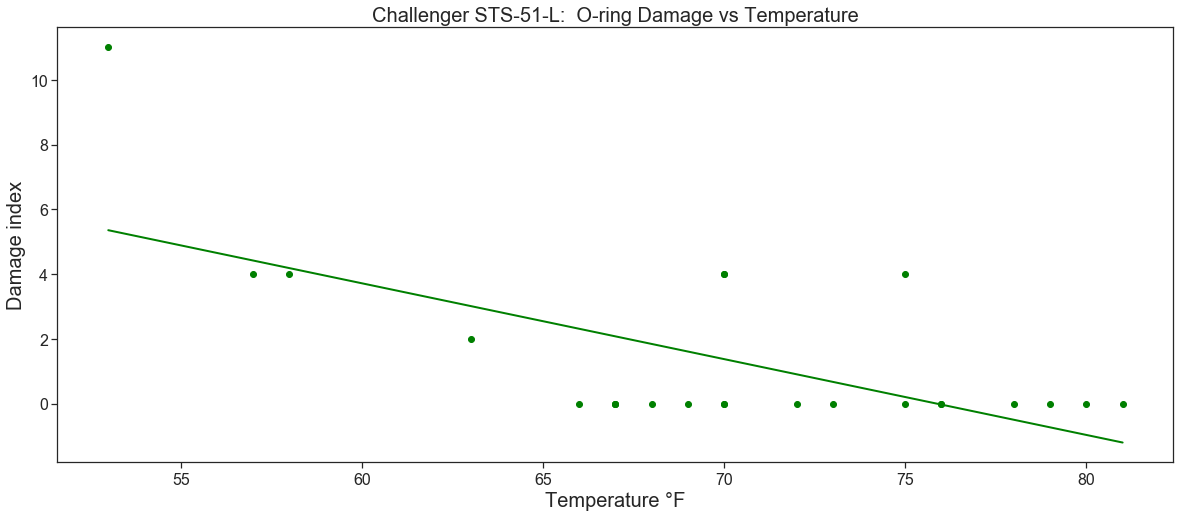

In [18]:
plt.figure(figsize=(20,8))
plt.scatter(X, Y, color="green")
plt.plot(X, Y_pred, color="green", linewidth=2)
plt.title("Challenger STS-51-L:  O-ring Damage vs Temperature", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Temperature °F", fontsize=20)
plt.ylabel("Damage index", fontsize=20)
plt.show()

In [20]:
# generate array of lower temps -- below temps of previous launches
Z = [x for x in range(20, 53)]
Z = np.asarray(Z).reshape(-1, 1)
Z_pred = linear_regressor.predict(Z)  # make predictions

# note some helpful datapoints
prior_launch_temp_min = df.iloc[:, 2].min().round(1)
challenger_launch_temp = 36
prior_damage_avg = df.loc[:, "Damage index"].mean().round(1)  # using historic data

# predict damage for temperature at time of launch
challenger_launch_temp_np = np.asarray(challenger_launch_temp).reshape(-1, 1)
challenger_damage_predicted = round(linear_regressor.predict(challenger_launch_temp_np)[0][0],1)


True

True

True

True

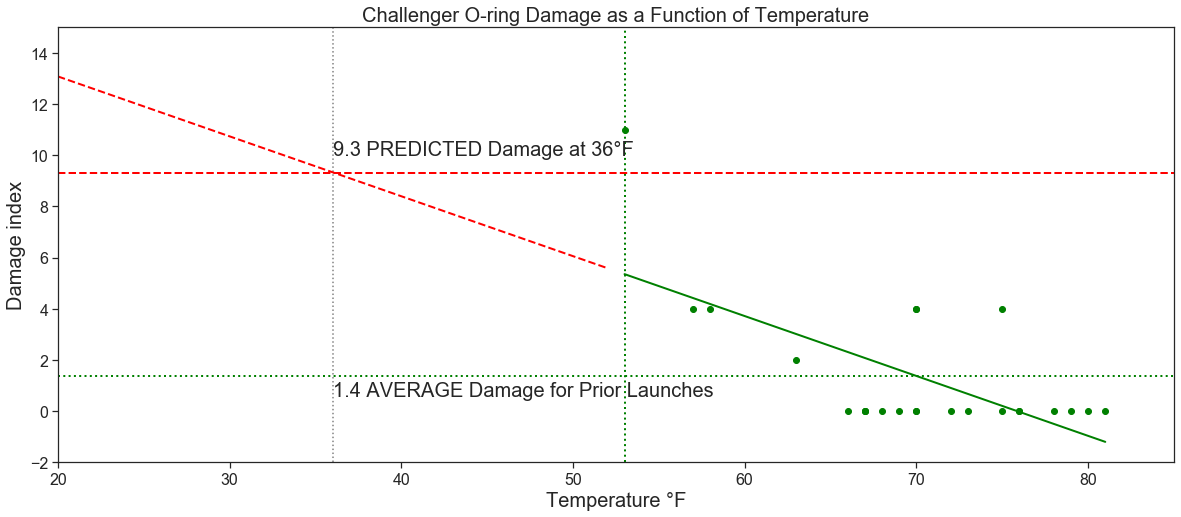

In [30]:
# create plot; use functions so we can build up graph step by step

def plot_history():
    plt.figure(figsize=(20,8))
    plt.title("Challenger O-ring Damage as a Function of Temperature", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlabel("Temperature °F", fontsize=20)
    plt.ylabel("Damage index", fontsize=20)
    plt.xlim(20, 85)
    plt.ylim(-2, 15)
    plt.scatter(X, Y, color="green")
    plt.plot(X, Y_pred, color='green', linewidth=2)                 # plot known history
    
    return True


def plot_key_temps():
    # highlight key temperatures
    plt.axvline(53, color="green", linestyle=":", linewidth=2)
    plt.axvline(36, color="grey", linestyle=":")
 
    return True

def plot_predicted_damage():
    plt.plot(Z, Z_pred, color='red', linestyle="--", linewidth=2)   # plot predicted damage
    
    return True


def plot_highlights():
    plt.axhline(df.loc[:, "Damage index"].mean(), color="green", linestyle="dotted", linewidth=2)
    plt.axhline(challenger_damage_predicted, color="red", linestyle="--", linewidth=2)

    # add some labels to hammer it home
    plt.text(36, 0.6, f"{prior_damage_avg} AVERAGE Damage for Prior Launches", fontsize=20)
    plt.text(36, 10, f"{challenger_damage_predicted} PREDICTED Damage at 36°F", fontsize=20)

    # ++ live damage ratio note
    
    return True

# uncomment lines below through discussion
plot_history()
plot_key_temps()
plot_predicted_damage()
plot_highlights()

plt.show()

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Challenger O-ring Damage as a Function of Temperature')

Text(0.5, 0, 'Temperature °F')

Text(0, 0.5, 'Damage index')

(20, 85)

(-2, 15)

Text(22, 1.75, '1.4 AVG Damage at LOWEST PRIOR TEMP OF 53°F')

Text(37, 9.75, '9.3 PREDICTED Damage at 36°F')

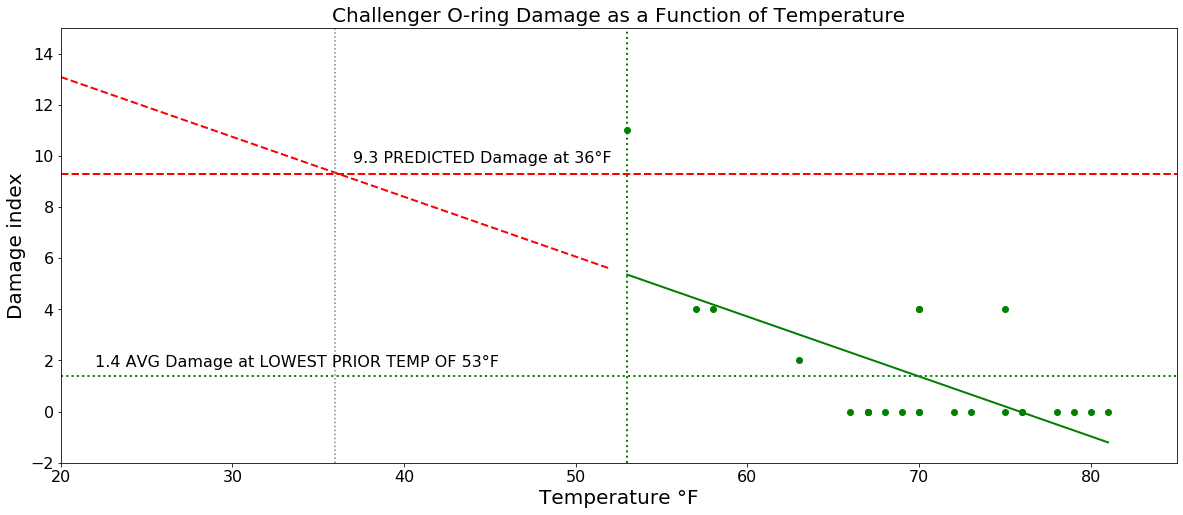

In [10]:
# reference slide:  same slide as previous - with everything in one shot
plt.figure(figsize=(20,8))
plt.title("Challenger O-ring Damage as a Function of Temperature", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Temperature °F", fontsize=20)
plt.ylabel("Damage index", fontsize=20)
plt.xlim(20, 85)
plt.ylim(-2, 15)
plt.scatter(X, Y, color="green")
plt.plot(X, Y_pred, color='green', linewidth=2)                 # plot known history

plt.plot(Z, Z_pred, color='red', linestyle="--", linewidth=2)   # plot predicted damage

# highlight key thresholds
plt.axvline(36, color="grey", linestyle=":")
plt.axvline(53, color="green", linestyle=":", linewidth=2)
plt.axhline(df.loc[:, "Damage index"].mean(), color="green", linestyle="dotted", linewidth=2)
plt.axhline(challenger_damage_predicted, color="red", linestyle="--", linewidth=2)

# add some labels to hammer it home
plt.text(22, 1.75, f"{prior_damage_avg} AVG Damage at LOWEST PRIOR TEMP OF 53°F", fontsize=16)
plt.text(37, 9.75, f"{challenger_damage_predicted} PREDICTED Damage at 36°F", fontsize=16)


plt.show()

# Why is visualization important?   *Numbers don't always show important facts* <br>

## Witness Anscome's Quartet:


Credit:  https://seaborn.pydata.org/examples/anscombes_quartet.html


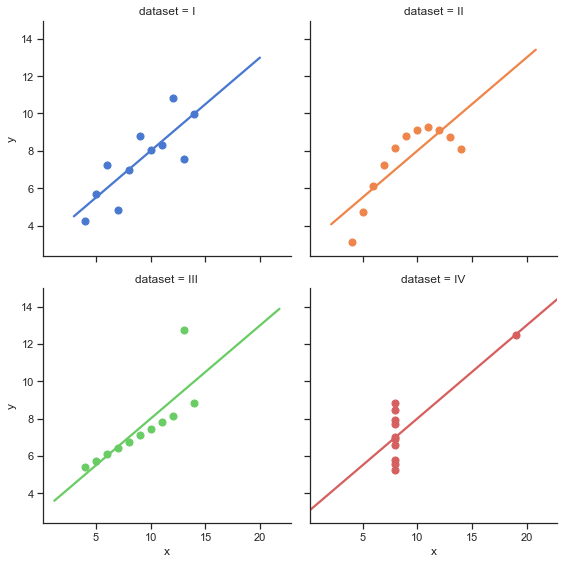

In [31]:
np.warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

print("\nCredit:  https://seaborn.pydata.org/examples/anscombes_quartet.html")

In [32]:
print("Mean of each dataset in df")
display(df.groupby(["dataset"]).mean())

print("\n\nCovariance - measures how changes are associated between variables")
display(df.groupby(["dataset"]).cov().round(1))

# print("\n\nCorrelation Coeffient (normalized Covariance)")
# display(df.groupby(["dataset"]).cov().round(1))

Mean of each dataset in df


,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909




Covariance - measures how changes are associated between variables


x    y
dataset             
I       x  11.0  5.5
        y   5.5  4.1
II      x  11.0  5.5
        y   5.5  4.1
III     x  11.0  5.5
        y   5.5  4.1
IV      x  11.0  5.5
        y   5.5  4.1

<img src="./images/anscombe's_quartet_3.svg_wikipedia.png" width=60% /><br>
<strong><italic>credit: Wikipedia<strong><italic><br>
<strong>[Pure witchcraft from:  Anscome's Quartet & Datasaurus](https://www.autodeskresearch.com/publications/samestats)</strong><br><br>
<strong>[Python/Seaborm page to generate and plot your own](https://seaborn.pydata.org/examples/anscombes_quartet.html)<br>

# 2- Learn about the grammar of graphics and how to choose the right visual approach

# Grammar of Graphics

- A structured framework that tells us how to construct graphics in a layered approach<br>
- From Leland Wilkinson's book of the same name<br>
- Drove creation of ggplot (R) and plotnine (python)<br><br>
<img src="./images/grammar_graphics_pyramid_1 mcLnnVdHNg-ikDbHJfHDNA.png" width=70% />

<strong>- resources to check out:</strong><br>
https://towardsdatascience.com/murdering-a-legendary-data-story-what-can-we-learn-from-a-grammar-of-graphics-ad6ca42f5e30<br>
https://www.slideshare.net/kesarifms/grammar-of-graphics-the-secret-sauce-of-powerful-data-stories<br>


# Find the graphic you need = objective + data you have
<a href="https://www.data-to-viz.com/" target="_blank"> <img src="./images/data_to_vis_screencap.png" title="Data to Vis Website" alt="Data to Vis Website"/></a><br><br>
[Data-to-Viz site - free, interactive tool](https://www.data-to-viz.com/)

# 3- Get a snapshot of the python visualization universe

- [PyVis landscape overview](https://pyviz.org/overviews/index.html)<br><br>
- [PyCon 2017 - Pythons Visualization Landscape by Jake VanderPlas](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017)<br><br>

In [33]:
# Focus of this talk
from itertools import cycle
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

# create list of images to rotate through
image_set = ["./images/pyvis_landscape_overview_2019_landscape-talk_highlights.png", "./images/pyvis_landscape_overview_2019_landscape-colors.png"]


images = [widgets.Image(value=open(name, "rb").read()) for name in image_set]
imagecycle = cycle(images)  # iterator of images

button = widgets.Button(description="Swap image")
output = widgets.Output()
display(button,widgets.Image(value=open("./images/pyvis_landscape_overview_2019_landscape-colors.png", "rb").read()))

def on_button_clicked(b):
    display(clear_output())
    display(button, output)
    display(next(imagecycle))

button.on_click(on_button_clicked)

None

Button(description='Swap image', style=ButtonStyle())

Output()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0b\xe8\x00\x00\x05\xc5\x08\x06\x00\x00\x00/\x82\x16…

# Audience Question - can you also touch on plotly and dash with pros/cons


[Data viz comparison matrix](http://www.pythongrids.org/grids/g/data-visualization/)<br>
[Datavis - why so many libraries](https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/)

<table>
    <tr style="vertical-align: top">
        <th style="vertical-align:top; text-align:right; font-size: 150%" width="200px"> <i></i></th>
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="200px"><b>Matplotlib</b></th>
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="200px"><b>Bokeh</b></th> 
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="200px"><b>Plotly</b></th> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>release year</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">2003</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">2013</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">2013</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>framework - front end</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">matplotlib</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Javascript</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Javascript</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>backend</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">many renderers<br></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Tornado<br></td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Flask<br></td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Dashboard Framework</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">None</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Panel</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Panel<br>Dash</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Supporting Libraries</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Seaborn</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Batteries Included</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Plotly<br>Express<br>Cufflinks</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Corporate Sponsor</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">None</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Anaconda</td> 
        <td style="tvertical-align:top; text-align:left; font-size: 150%">Plotly - the company</td> 
    </tr>
    <tr style="vertical-align: top">
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Maybe you didn't know</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Oldest visualization library</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Intelligent Errors - similar attributes are {some suggestions...}</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Used to require plotly account, but now does not - run offline!<br><br> has supporting gui (Chart Studio)</td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>Pandas API</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>Jupyter Notebook</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>JupyterLab</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><strong><i>Awesome library you should try</i></strong></td>
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td>
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td> 
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td> 
    </tr>
</table>


# What have we learned so far?

0 - People have very strong visual perception

1- Images effectively distilling insight

2- Images provide insights that pure numbers/tables do not

3- Graphics have a grammar similar to writing

4- Python has a lot of visualization libraries


# [link to our next chapter - matplotlib](http://localhost:8888/notebooks/notebooks/01_matplotlib_chapter.ipynb)